In [1]:
%run efx_charity

loaded efx algorithm


## Example

APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
COULD NOT APPLY U0
trying U2 with source: 1
APPLIED U2
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
DONE
player 0 assignments: [ 6. 10.  0.]
player 1 assignments: [ 4. 12.  4.]
player 2 assignments: [0. 8. 6.]


(3,
 3,
 array([[ 6., 10.,  0.],
        [ 4., 12.,  4.],
        [ 0.,  8.,  6.]]),
 array([10., 30., 10.]),
 array([[ 4.2,  2. ,  1. ],
        [ 3. ,  2.5,  0.1],
        [ 1. ,  5. , 29. ]]))

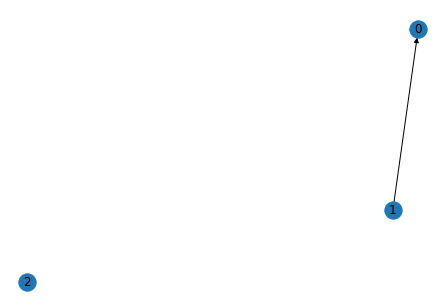

In [2]:
#n, t, assignments, items, valuations
data = (3,3,
 np.zeros((3,3)),
 np.array([10., 30., 10.]),
 np.array([[4.2, 2., 1],
        [3., 2.5, 0.1],
        [1., 5., 29]]))
run_and_check(draw=True, inputs=data, log=True)

## Randomly generate cases

In [3]:
n = 3
t = 2
items = [20, 5]
for i in range(100):
    print(i)
    valuations = np.random.random((n,t))*10
    data = (n,t, np.zeros((n,t)), items, valuations)
    run_and_check(draw=False, inputs=data, log=True)

0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
DONE
player 0 assignments: [7. 1.]
player 1 assignments: [7. 1.]
player 2 assignments: [6. 3.]
1
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
DONE
player 0 assignments: [7. 2.]
player 1 assignments: [7. 1.]
player 2 assignments: [6. 2.]
2
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
APPLIED U0
A

AssertionError: ALL ITEMS SHOULD BE ALLOCATED

## Another algorithm

This one does round robin on any source.

In [351]:
def run_rr(inputs=None):
    n, t, assignments, items, valuations = inputs if inputs else setup()
    # algorithm
    while True:
        # assert partial EFX
#         assert check_all_efx(assignments, valuations), "this should be partial EFX"
        # de cycle graph if needed
        G = create_envy_digraph(assignments, valuations, n)
        is_cycle, cycle = locate_envy_cycle(G)
        while is_cycle:
#             print("DE-CYCLING GRAPH")
            cycle_mask = [e[0] for e in locate_envy_cycle(G)[1]]
            cycle_mask_new = cycle_mask[1:] + cycle_mask[0:1]
            assignments[cycle_mask_new] = assignments[cycle_mask]
            G = create_envy_digraph(assignments, valuations, n)
            is_cycle, cycle = locate_envy_cycle(G)
        assert is_directed_acyclic_graph(G)
        # check if done
        if check_all_done(assignments, items):
#             print("DONE")
            return n, t, assignments, items, valuations
        # find a source and assign it its favorite item
        all_sources = [s for s,d in G.in_degree() if d == 0]
        np.random.shuffle(all_sources)
#         print(all_sources)
        added_item = False
        for s in all_sources:
            prefs = np.argsort(valuations[s,:])[::-1]
            for p in prefs:
                if item_type_available(assignments, items, p):
                    # if available but not EFX, dont use this source
                    assignments[s,p] += 1
                    if check_all_efx(assignments, valuations):
#                         print("assigning type", p, "to player", s)
                        added_item = True
                    else:
                        assignments[s,p] -= 1
                    break
            if added_item:
                break
        if added_item:
            continue
        print("COULDNT ADD ITEM(?)")
        return n, t, assignments, items, valuations

In [372]:
n = 3
t = 3
trials = 10000
all_items = np.random.randint(1, 100, (trials, t))
all_valuations = np.random.random((trials, n,t))*10

for i in range(trials):
    if i % 50 == 0:
        print(i)
    items = all_items[i, :]
    valuations = all_valuations[i, :, :]
    data = (n,t, np.zeros((n,t)), items, valuations)
    
    out = run_rr(inputs=data)
    assert check_all_efx(out[2], out[4]), "EFX SHOULD HOLD"
    while not check_all_done(out[2], out[3]):
        print('i = ', i, 'trying again...')
        data = (n,t, np.zeros((n,t)), items, valuations)
        out = run_rr(inputs=data)  # "ALL ITEMS SHOULD BE ALLOCATED"

0
50
100
150
200
250
300
350
400
450
500
550
600
COULDNT ADD ITEM(?)
i =  608 trying again...
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
COULDNT ADD ITEM(?)
i =  1331 trying again...
1350
COULDNT ADD ITEM(?)
i =  1378 trying again...
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
COULDNT ADD ITEM(?)
i =  1973 trying again...
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
COULDNT ADD ITEM(?)
i =  3363 trying again...
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
COULDNT ADD ITEM(?)
i =  4261 trying again...
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
COULDNT ADD ITEM(?)
i =  5484 trying again...
5500
5550
5600
5650
COULDNT ADD ITEM(?)
i =  5696 trying again...
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6

In [374]:
# most of the slowdown is checking EFX
# could 2-3x the speedup by fixing this

# %prun run_rr(inputs=data)